Import libraries  

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import squarify
warnings.filterwarnings('ignore')

Load the Dataset

In [2]:
df = pd.read_csv('retail_sales_dataset.csv')

Data Exploration 

In [3]:
df.shape

(1000, 9)

In [4]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [21]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Most of our customers are around 42 years old, while our top 25% are younger, averaging 29 years old. Typically, customers order about 3 products, with the most being 4. Our best customers spend around 180 on average, but some go up to 500. Overall, the average order totals about 456, with the highest hitting 2000.

In [22]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [23]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [24]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [25]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


Data Visualisation 

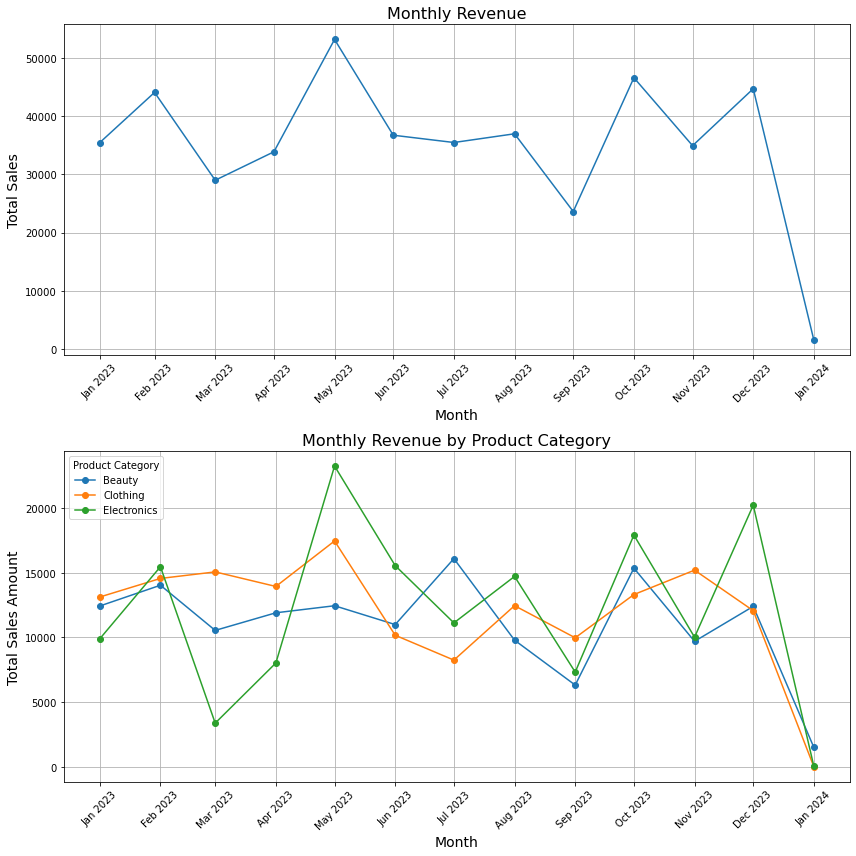

In [6]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create a figure and set of subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot Monthly Sales Trend
monthly_sales = df.resample('M', on='Date')['Total Amount'].sum()
axes[0].plot(monthly_sales.index, monthly_sales.values, marker='o')
axes[0].set_title('Monthly Revenue', fontsize=16)
axes[0].set_xlabel('Month', fontsize=14)
axes[0].set_ylabel('Total Sales', fontsize=14)
axes[0].grid(True)
axes[0].set_xticks(monthly_sales.index)
axes[0].set_xticklabels([month.strftime('%b %Y') for month in monthly_sales.index], rotation=45)

# Plot Monthly Sales Trend by Product Category
monthly_category_sales = df.groupby([df['Date'].dt.to_period('M'), 'Product Category'])['Total Amount'].sum().reset_index()
pivot_table = monthly_category_sales.pivot(index='Date', columns='Product Category', values='Total Amount').fillna(0)

for category in pivot_table.columns:
    axes[1].plot(pivot_table.index.to_timestamp(), pivot_table[category], marker='o', label=category)

axes[1].set_title('Monthly Revenue by Product Category', fontsize=16)
axes[1].set_xlabel('Month', fontsize=14)
axes[1].set_ylabel('Total Sales Amount', fontsize=14)
axes[1].grid(True)
axes[1].legend(title='Product Category')
axes[1].set_xticks(pivot_table.index.to_timestamp())
axes[1].set_xticklabels([date.strftime('%b %Y') for date in pivot_table.index.to_timestamp()], rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

The monthly revenue was pretty balanced throughout the year, except for May 2023. Looking at the first visual, May 2023 had the highest revenue of the year. The second visual shows that Electronics were behind the spike. It'd be worth digging into what caused that jump in May 2023.

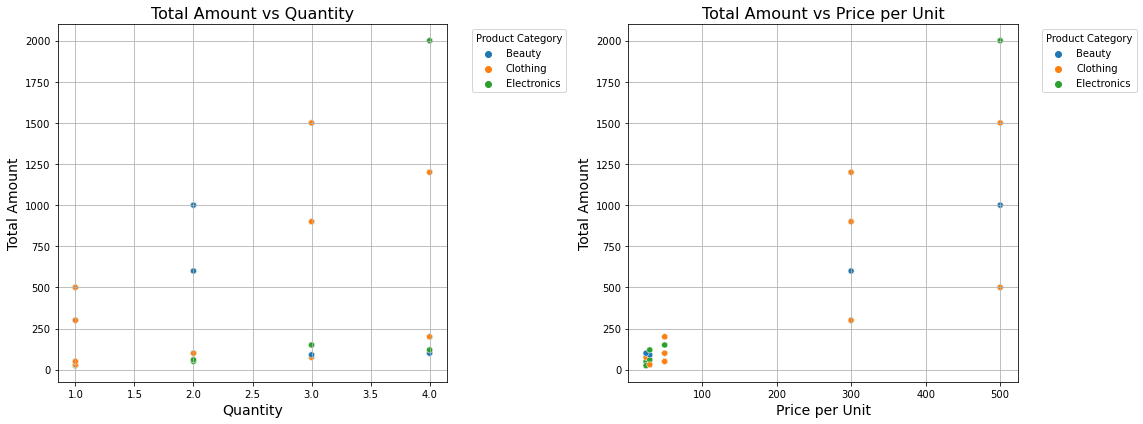

In [34]:
#Total Amount vs Unit Price vs Quantity by Product Category
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for Total Amount vs Quantity
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Product Category', ax=axes[0])
axes[0].set_title('Total Amount vs Quantity', fontsize=16)
axes[0].set_xlabel('Quantity', fontsize=14)
axes[0].set_ylabel('Total Amount', fontsize=14)
axes[0].grid(True)
axes[0].legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Scatter plot for Total Amount vs Price per Unit
sns.scatterplot(data=df, x='Price per Unit', y='Total Amount', hue='Product Category', ax=axes[1])
axes[1].set_title('Total Amount vs Price per Unit', fontsize=16)
axes[1].set_xlabel('Price per Unit', fontsize=14)
axes[1].set_ylabel('Total Amount', fontsize=14)
axes[1].grid(True)
axes[1].legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

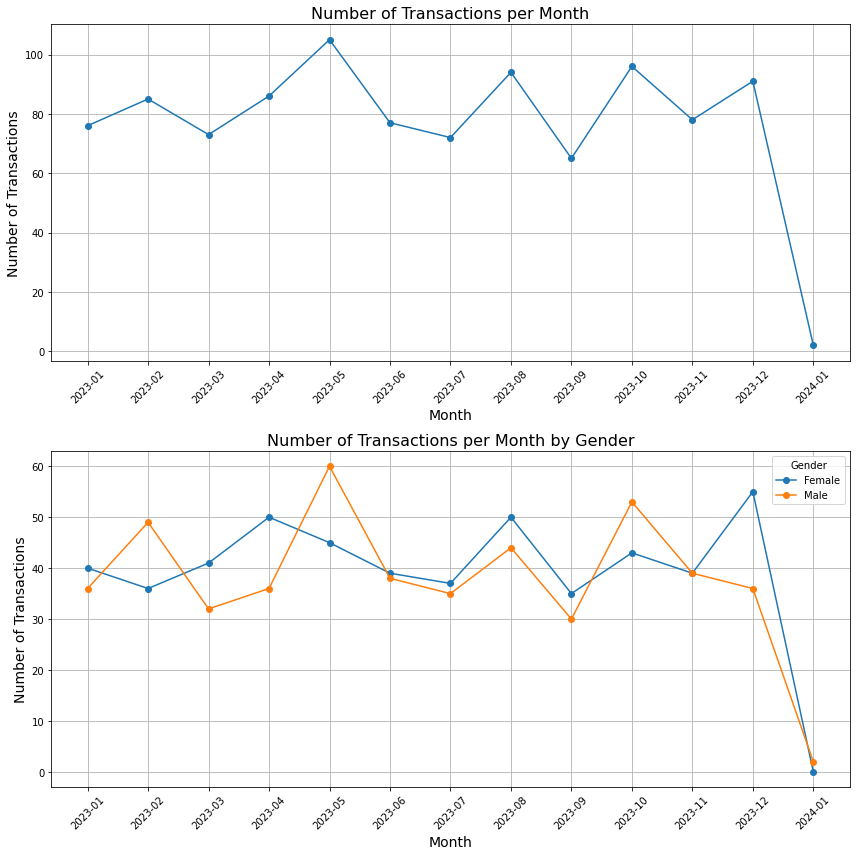

In [44]:
# Parse the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the Date column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group by YearMonth and Gender columns and count the number of transactions
transactions_by_gender = df.groupby(['YearMonth', 'Gender']).size().unstack(fill_value=0)

# Group by YearMonth and count the number of transactions
transactions_per_month = df.groupby('YearMonth').size()

# Create a figure and set of subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot the number of transactions per month
axes[0].plot(transactions_per_month.index.astype(str), transactions_per_month, marker='o')
axes[0].set_title('Number of Transactions per Month', fontsize=16)
axes[0].set_xlabel('Month', fontsize=14)
axes[0].set_ylabel('Number of Transactions', fontsize=14)
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

# Plot the number of transactions by gender
for gender in transactions_by_gender.columns:
    axes[1].plot(transactions_by_gender.index.astype(str), transactions_by_gender[gender], label=gender, marker='o')

axes[1].set_title('Number of Transactions per Month by Gender', fontsize=16)
axes[1].set_xlabel('Month', fontsize=14)
axes[1].set_ylabel('Number of Transactions', fontsize=14)
axes[1].legend(title='Gender')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

The number of transactions was pretty steady each month. The dip from January to March 2023 might be because of the New Year and people cutting back after spending a lot on Christmas gifts and over the holidays.
Interestingly, there’s not a huge difference in the number of transactions between males and females. However, it’s clear that men have placed a lot of orders for Electronics in May 2023.

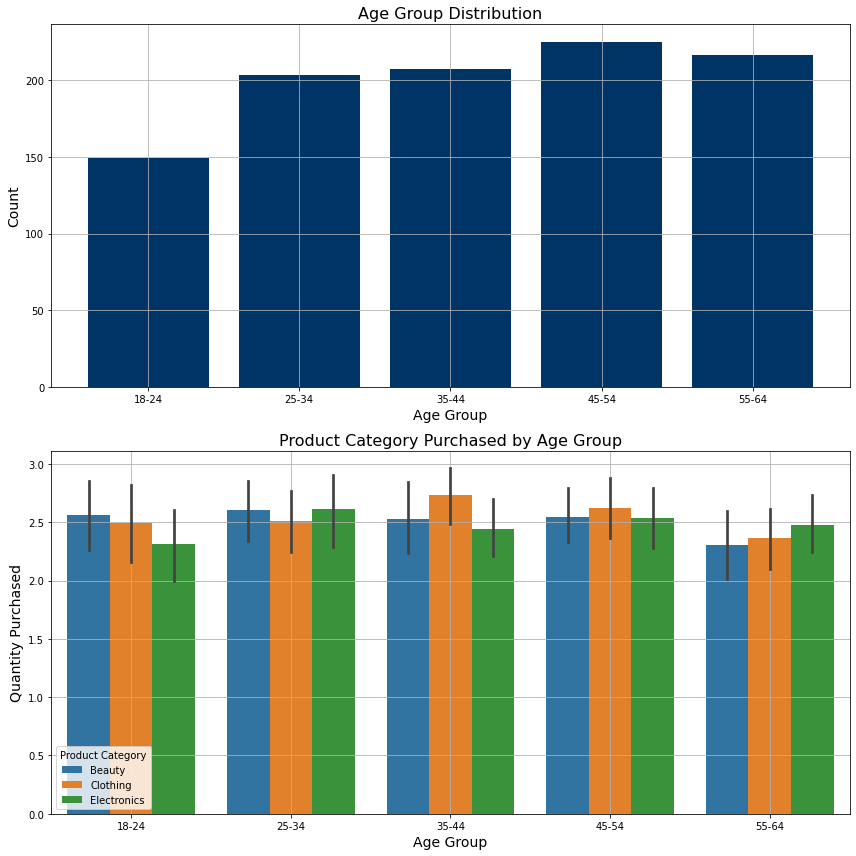

In [40]:
# Define age bins and labels
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Create a figure and set of subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot Age Group Distribution as a bar chart with a darker blue shade
age_distribution = df['Age Group'].value_counts().sort_index()
axes[0].bar(age_distribution.index, age_distribution.values, color='#003366')  
axes[0].set_title('Age Group Distribution', fontsize=16)
axes[0].set_xlabel('Age Group', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].grid(True)


# Plot Product Category Purchased by Age Group
sns.barplot(x='Age Group', y='Quantity', hue='Product Category', data=df, ax=axes[1])
axes[1].set_title('Product Category Purchased by Age Group', fontsize=16)
axes[1].set_xlabel('Age Group', fontsize=14)
axes[1].set_ylabel('Quantity Purchased', fontsize=14)
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

Our customer base predominantly consists of individuals aged 35 to 64, indicating that they are more established and likely to have a higher income, as our products are positioned in the premium segment. Beauty products are especially popular among customers aged 18 to 34, while clothing and electronics are more frequently purchased by those in the 35 to 64 age range.